Enter the qunadl API key5UyYes-8w4uDj-83kaFn
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       236 non-null    datetime64[ns]
 1   ticker     236 non-null    object        
 2   adj_close  236 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 5.7+ KB
               AAPL     AMZN        FB    GOOGL
date                                           
2018-01-02  172.260  1189.01  181.4200  1073.21
2018-01-03  172.230  1204.20  184.6700  1091.52
2018-01-04  173.030  1209.59  184.3300  1095.76
2018-01-05  175.000  1229.14  186.8500  1110.29
2018-01-08  174.350  1246.87  188.2800  1114.21
2018-01-09  174.330  1252.70  187.8700  1112.79
2018-01-10  174.290  1254.33  187.8400  1110.14
2018-01-11  175.280  1276.68  187.7700  1111.88
2018-01-12  177.090  1305.20  179.3700  1130.65
2018-01-16  176.1

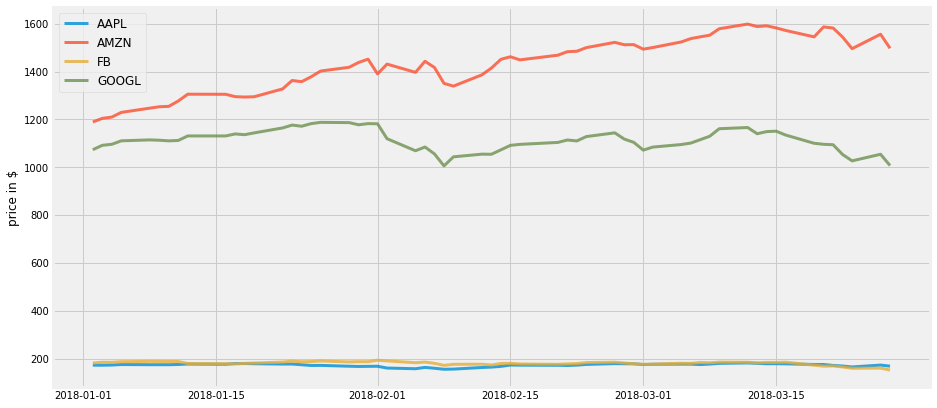

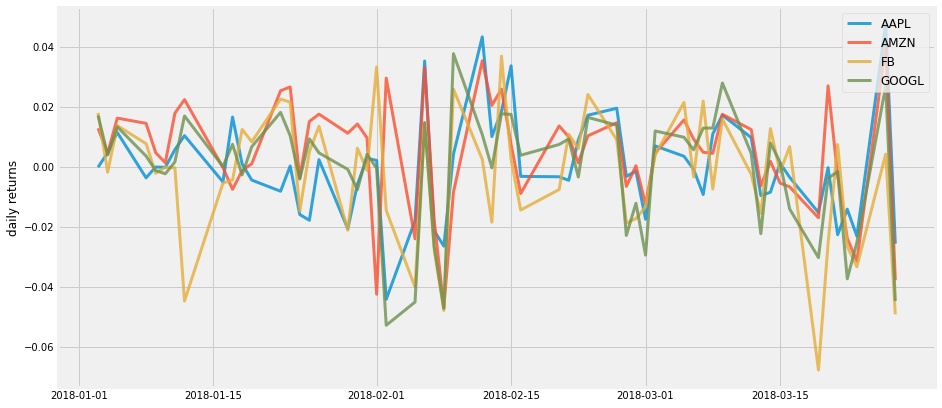

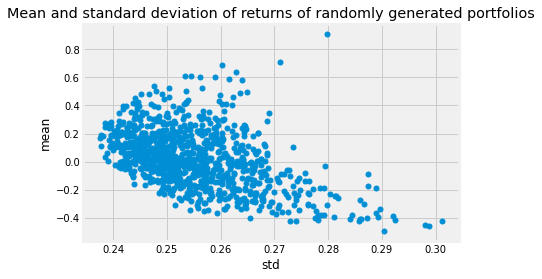

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Aug  7 12:48:02 2020

@author: This_PC
"""

###############################################################################
# ** In this program we have used quandl to get the actual price of the share. But used random weights to optimize our portfolio. 
# if you dont want to opt for quandl and keep things little bit simple, then you can intialize the assests in the portfolio randomly. 


                                # step wise explaination

# line 38 to 44 import all the required libraries. Quandl is the new library to be installed 
# To install qundle  :- pip install quandl (for python),  conda install -c anaconda quandl (for anaconda users)
# After installing quandl, register with the website  https://www.quandl.com/. To get your API key. (Beware of the volume limit)
# Here we used fivethirtyeight styling for plot, It is a website which used a different plotting style. 
# In line 68   false implies not to show step by step solution. 
# While config the api for quandl "Insert your api key".
# After collecting data, rearrange the data with respect to tickers. 
# Plot the price with respect to the time from line 87 to 99.
# pct_change function from pandas will find the percenatge change in the data over the time period.
# Function random_weights will generate the random weights for each assest which is sum upto 1. assuming our overall alloted budget 
 #for the portfolio is one. 
# Function portfolio_annualised_performance will calulate the annual mean and standard deviation for the given portfolio with the set of weights 
# line 107  will call the above function for q times.
# After calculation the overall min and standard deviation for q portfolios, we can plot it to the see the volatility 


###############################################################################


! pip install Quandl
! pip install cvxopt
# markowitz portfolio management


import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import quandl
import cvxopt as opt  
from cvxopt import blas, solvers 



def random_weights(n):
    weights = np.random.random(n)
    weights /= np.sum(weights)
    return weights
    

def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    global trade_days 
    returns = np.sum(mean_returns*weights ) *trade_days
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(trade_days)
    return returns,std





if __name__ =="__main__":
    your_api = input("Enter the qunadl API key" )
    plt.style.use('fivethirtyeight')
    np.random.seed(777)
    solvers.options['show_progress'] = False 
    %matplotlib inline
    #%config InlineBackend.figure_format = 'retina'
    quandl.ApiConfig.api_key = your_api
    stocks = ['AAPL','AMZN','GOOGL','FB'] # selected stocks (can update the stocks here). 
    data = quandl.get_table('WIKI/PRICES', ticker = stocks, qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
    date = { 'gte': '2018-1-1', 'lte': '2019-12-31' }, paginate=True) # collected data in the stated duration of the time 
    data.head()
    data.info()
    # data consist of date, abbreviated form of the stock and closing price. 

    df = data.set_index('date')
    table = df.pivot(columns='ticker')
    # By specifying col[1] in below list comprehension
    # You can select the stock names under multi-level column
    table.columns = [col[1] for col in table.columns]
    table.head()

    print(table)
    plt.figure(figsize=(14, 7))
    for c in table.columns.values:
        plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c)
    plt.legend(loc='upper left', fontsize=12)
    plt.ylabel('price in $')


    returns = table.pct_change()
    plt.figure(figsize=(14, 7))
    for c in returns.columns.values:
        plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
    plt.legend(loc='upper right', fontsize=12)
    plt.ylabel('daily returns')


    mean_returns = returns.mean() # mean for each assest 
    cov_matrix = returns.cov() # covaraiance matrix for each asset 
    n_portfolios = 1000 # random no of portfolios to be considered for analysis 
    trade_days =252 # no of trading days in an year 
    
    means, stds = np.column_stack([portfolio_annualised_performance(random_weights(len(stocks)),mean_returns, cov_matrix)for _ in range(n_portfolios)
])

    #mean_idx = np.argmax(means)
    #std_idx= np.argmin(stds)
    fig = plt.figure()
    plt.plot(stds, means, 'o', markersize=5)
    plt.xlabel('std')
    plt.ylabel('mean')
    plt.title('Mean and standard deviation of returns of randomly generated portfolios')
    plt.show()